In [18]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

data = pd.read_csv('airquality.csv')

1\. By looking at scatter plots and correlations between Ozone and each of Solar.R, Wind and Temp, state which variable has the strongest linear relationship with Ozone, and which has the weakest linear relationship.

/Users/jencruz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[ 1.        ,  0.34834169, -0.61249658,  0.69854141],
       [ 0.34834169,  1.        , -0.12718345,  0.29408764],
       [-0.61249658, -0.12718345,  1.        , -0.49718972],
       [ 0.69854141,  0.29408764, -0.49718972,  1.        ]])

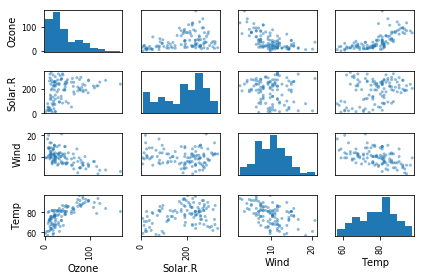

In [19]:
pd.tools.plotting.scatter_matrix(data)
plt.tight_layout()
np.corrcoef(data.T)

Based on the plots and correlations, the varibale with the strongest linear relationsihp with Ozone is Temp and the the variable with the weakest linear relationship with Ozone is Solar.R

2\. Fit a multiple linear regression model treating Ozone as the response variable and Solar.R, Wind, and Temp as explanatory variables and interpret each regression coefficient.

In [20]:
y = data['Ozone']
x1 = data['Solar.R']
x2 = data['Wind']
x3 = data['Temp']
mlrModel1 = smf.ols('y ~ x1 + x2 + x3', data = data).fit()
mlrModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Fri, 19 Oct 2018   Prob (F-statistic):           1.51e-21
Time:                        11:02:20   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.3421     23.055     -2.791      0.006    -110.045     -18.639
x1             0.0598      0.023      2.580      0.011       0.014       0.106
x2            -3.3336      0.654     -5.094      0.000      -4.631      -2.036
x3             1.6521      0.254      6.516      0.000       1.149       2.155
==============================================================================
Omnibus:                       38.348   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.801
Skew:                           1.362   Prob(JB):                     3.85e-19
Kurtosis:                       6.303   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* $\hat{𝛽_{0}}$ = -64.3421 => When Solar.R, Wind and Temp are all equal to zero, the expected value of Ozone is -64.3421.
* $\hat{𝛽_{1}}$ = 0.0598 => For a unit increase in Solar.R (holding all else constant), the expected value in Ozone should INCREASE by 0.0598.
* $\hat{𝛽_{2}}$ = -3.3336 => For a unit increase in Wind (holding all else constant), the expected value in Ozone should DECREASE by 3.3336.
* $\hat{𝛽_{3}}$= 1.6521 => For a unit increase in Temp (holding all else constan), the expected value in Ozone should INCREASE by 1.6521.

3\. What proportion of variation in Ozone measurements does this model not explain?

From \#2 we see that ${𝑅^{2}}$ = 0.606, this model explains 60.6% of the variation in Ozone measurements meaning that it does not explain 100-60.6 = 39.4% of the variation in Ozone measurements.

4\. Fit a “mean-corrected” version of the model in \#2 and interpret the intercept, and state the estimate of this parameter.

In [21]:
x1_corr = x1 - np.mean(x1)
x2_corr = x2 - np.mean(x2)
x3_corr = x3 - np.mean(x3)
mlrModel1_corr = smf.ols('y ~ x1_corr + x2_corr + x3_corr', data = data).fit()
mlrModel1_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Fri, 19 Oct 2018   Prob (F-statistic):           1.51e-21
Time:                        11:02:21   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.0991      2.010     20.941      0.000      38.114      46.084
x1_corr        0.0598      0.023      2.580      0.011       0.014       0.106
x2_corr       -3.3336      0.654     -5.094      0.000      -4.631      -2.036
x3_corr        1.6521      0.254      6.516      0.000       1.149       2.155
==============================================================================
Omnibus:                       38.348   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.801
Skew:                           1.362   Prob(JB):                     3.85e-19
Kurtosis:                       6.303   Cond. No.                         90.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{𝛽_{0}}$ = 42.099910 => When Solar.R, Wind, and Temp are all equal to their average values the the expected value of Ozone is 42.099910

5\. Construct a scatter plot of the residuals from the model in \#2 vs. their index. Do these residuals appear to be independent? Justify your response.

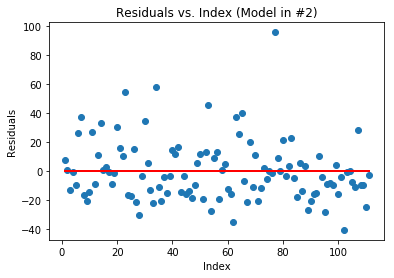

In [22]:
n = data.shape[0]
index = np.linspace(start=1, stop=n, num=n)
plt.scatter(x = index, y = mlrModel1.resid)
plt.title("Residuals vs. Index (Model in #2)")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.plot(index, np.repeat(0, n), '-', color = "red", linewidth = 2)

This plot shows that there is no patterns between the residuals meaning that they are not related despite the distance from one another. Therefore, the residuals and model errors are independent since that are not significantly correlated.

6\. Construct a scatter plot of the residuals vs. the fitted values associated with the model in \#2. Do these residuals seem to have a constant variance? Justify your response.

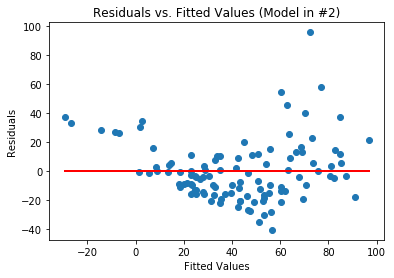

In [23]:
plt.scatter(x = mlrModel1.fittedvalues, y = mlrModel1.resid)
plt.title("Residuals vs. Fitted Values (Model in #2)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.plot(mlrModel1.fittedvalues, np.repeat(0, n), '-', color = "red", linewidth = 2)

This plot illustartes a "funnel" like pattern in the plot which is created by the small variability in the small fitted values and large variability in the large fitted values. Therefore, the variance for residuals and model errors is NOT contant.

7\. Construct a QQ-plot of the residuals from the model in \#2. Do these residuals appear to be normally distributed?

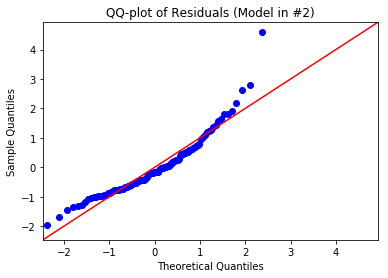

In [24]:
sm.qqplot(mlrModel1.resid, stats.norm, fit = True, line = '45')
plt.title("QQ-plot of Residuals (Model in #2)")

No, the residuals are not normally distrubuted. If the normaility function is valid then we should expect to see the points fall on the 45 degree line through the origin (line of equality). Therefore, this plot illustartes a departure from normality, more specifically a right-skewed distribution.

8\. Fit the same linear regression model as in \#2, except with log(Ozone) as the response variable.

In [25]:
y_log = np.log(y)
mlrModel1_log = smf.ols('y_log ~ x1 + x2 + x3', data = data).fit()
mlrModel1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     70.62
Date:                Fri, 19 Oct 2018   Prob (F-statistic):           2.90e-25
Time:                        11:02:24   Log-Likelihood:                -80.413
No. Observations:                 111   AIC:                             168.8
Df Residuals:                     107   BIC:                             179.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2621      0.554     -0.474      0.637      -1.360       0.835
x1             0.0025      0.001      4.518      0.000       0.001       0.004
x2            -0.0616      0.016     -3.918      0.000      -0.093      -0.030
x3             0.0492      0.006      8.077      0.000       0.037       0.061
==============================================================================
Omnibus:                        9.871   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               14.961
Skew:                          -0.398   Prob(JB):                     0.000564
Kurtosis:                       4.613   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9\. Redo \#5-7 but based on the residuals and fitted values from the model in \#8.

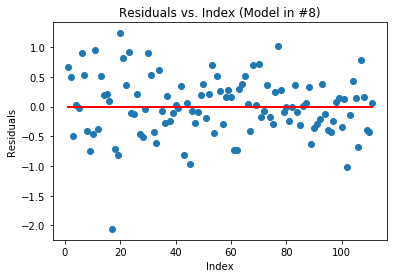

In [26]:
#Residuals v Index w/ Model from #8
plt.scatter(x = index, y = mlrModel1_log.resid)
plt.title("Residuals vs. Index (Model in #8)")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.plot(index, np.repeat(0, n), '-', color = "red", linewidth = 2)

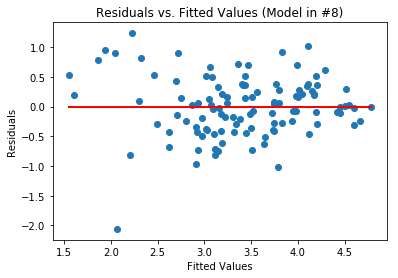

In [27]:
#Residuals v Fitted Value w/ Model from #8
plt.scatter(x = mlrModel1_log.fittedvalues, y = mlrModel1_log.resid)
plt.title("Residuals vs. Fitted Values (Model in #8)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.plot(mlrModel1_log.fittedvalues, np.repeat(0, n), '-', color = "red", linewidth = 2)

The plots above illustarte that the residuals are not dependent on the index or fitted values since there is now no pattern in either plots, so using the log of the reponse made the residuals are uncorrelated with a constant variance. 

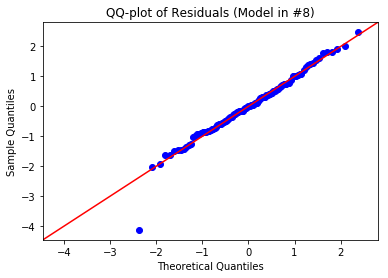

In [28]:
#QQplot of Residuals w/ Model from #8
sm.qqplot(mlrModel1_log.resid, stats.norm, fit = True, line = '45')
plt.title("QQ-plot of Residuals (Model in #8)")

The QQ-plot shows a valid normailty function, so using the log of the response changed the locaion of the points since they now fall on the line of equality (excepet for one point).

10\. Based on the residual plots in \#9, do you believe there are any outliers in the data? Provide a conjecture for how someone might objectively identify outliers using residuals.

In all three plots you can notice that there is always that one point that is very far from the rest of th points, so this could be considered an outlier. Someone can identify outliers by using studentized residuals since it follows a normal distribution. Thus, any point that is outside the range (variaton within +3/-3) would be considered an outlier since it would significantly larger or smaller compared to the points within the range.  

